<a href="https://colab.research.google.com/github/JorgeICS/Primeos_Analisis_Geopandas/blob/main/nodos_ciclo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas pandas matplotlib

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
CF_todas_simp = gpd.read_file('/content/drive/MyDrive/Carreteras/filtradas/CF_todas_simp.geojson')

In [ ]:
sin_ID = CF_todas_simp.loc[(CF_todas_simp['NOMBRE']=='nd')]

In [ ]:
sin_ID.shape

(1000, 23)

In [ ]:
#  QUITAR TODOS LOS DATOS QUE SON =  'nd' de la columna NOMBRE en CF_todas_simp Y poneros en la variable CF_con_ID

CF_con_ID = CF_todas_simp.loc[(CF_todas_simp['NOMBRE']!='nd')]


In [ ]:
CF_con_ID.shape

(114586, 23)

In [ ]:
columnas_originales=CF_todas_simp.columns
nuevos_ID= pd.DataFrame(columns=columnas_originales)

In [ ]:
columnas_originales

Index(['ID_RED', 'TIPO_VIAL', 'NOMBRE', 'CODIGO', 'COND_PAV', 'RECUBRI',
       'CARRILES', 'ESTATUS', 'CONDICION', 'NIVEL', 'PEAJE', 'ADMINISTRA',
       'JURISDI', 'CIRCULA', 'ESCALA_VIS', 'VELOCIDAD', 'UNION_INI',
       'UNION_FIN', 'LONGITUD', 'ANCHO', 'FECHA_ACT', 'CALIREPR', 'geometry'],
      dtype='object')

In [ ]:
nuevos_ID.shape

(0, 23)

In [ ]:
# EL BUENO
columna1 = 'UNION_INI'
columna2 = 'UNION_FIN'
columna3 = 'CODIGO'
# Columnas CF_con_ID
columna4 = 'NOMBRE'

while len(sin_ID)>431:

  for idx, row in sin_ID.iterrows():

    if (row[columna1] in CF_con_ID[columna2].values) and (row[columna2] in CF_con_ID[columna1].values):
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] in CF_con_ID[columna2].values and (row[columna2] not in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna2] == row[columna1], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    elif row[columna1] not in CF_con_ID[columna2].values and (row[columna2] in CF_con_ID[columna1].values) and row[columna3] in CF_con_ID[columna3].values:
      nombre_nuevo = CF_con_ID.loc[CF_con_ID[columna1] == row[columna2], 'NOMBRE'].values[0]
      sin_ID.at[idx, 'NOMBRE'] = nombre_nuevo
      añadir=sin_ID.loc[sin_ID['NOMBRE'].str.len()>2]
      CF_con_ID=pd.concat([añadir, CF_con_ID],ignore_index=False)
      nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)
      sin_ID = sin_ID.loc[sin_ID['NOMBRE'].str.len()==2]

    else:
      sin_ID.at[idx, 'NOMBRE'] = sin_ID.at[idx, 'NOMBRE']




<ipython-input-96-066eb8447e5b>:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nuevos_ID=pd.concat([añadir, nuevos_ID],ignore_index=False)


In [ ]:
nuevos_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry


In [ ]:
sin_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
455,12925,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,80,1490838,1490839,703.185436,6.5,2020-10-12 12:53:13,Definida,"LINESTRING (-101.65692 17.75876, -101.65677 17..."
458,12934,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,80,929164,2852,1018.532121,6.5,2021-04-15 12:29:14,Definida,"LINESTRING (-101.64469 17.75337, -101.64459 17..."
523,13325,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,80,1490839,929163,646.472456,6.5,2020-10-12 12:25:30,Definida,"LINESTRING (-101.65131 17.75550, -101.65111 17..."
536,13387,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,2,80,2852,2698,165.746736,6.5,2021-04-21 13:12:46,Definida,"LINESTRING (-101.63713 17.74802, -101.63702 17..."
720,14380,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,3,80,929605,1491310,578.254864,6.5,2020-10-12 11:10:33,Definida,"LINESTRING (-101.87095 17.96040, -101.86916 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112633,2647944,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,2,50,481396,481397,48.106395,8.0,2022-08-01 19:11:43,Definida,"LINESTRING (-98.85756 19.67894, -98.85773 19.6..."
112634,2647945,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Un sentido,2,50,481398,481396,45.828791,8.0,2022-08-01 19:11:53,Definida,"LINESTRING (-98.85799 19.67902, -98.85795 19.6..."
114019,3061140,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,40,794399,794400,5.889365,9.0,2023-05-12 18:33:26,Definida,"LINESTRING (-98.71714 20.12692, -98.71717 20.1..."
114041,3065070,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,1,40,797319,797320,10.969842,9.0,2023-05-15 16:05:09,Definida,"LINESTRING (-98.71354 20.12010, -98.71349 20.1..."


In [ ]:
zaragoza=CF_todas_simp.loc[CF_todas_simp['NOMBRE']=='zaragoza-la_encantada-la_bolsa']

In [ ]:
zaragoza

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,CIRCULA,ESCALA_VIS,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry
37614,399279,Carretera,zaragoza-la_encantada-la_bolsa,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,Dos sentidos,3,70,1017822,1018586,3114.78103,6.0,2023-08-07 22:24:19,Definida,"LINESTRING (-99.98551 23.74283, -99.98565 23.7..."


In [ ]:
zigua = CF_con_ID.loc[CF_con_ID['NOMBRE']=='zihuatanejo-la_mira']
ziguan = nuevos_ID.loc[nuevos_ID['NOMBRE']=='zihuatanejo-la_mira']


<Axes: >

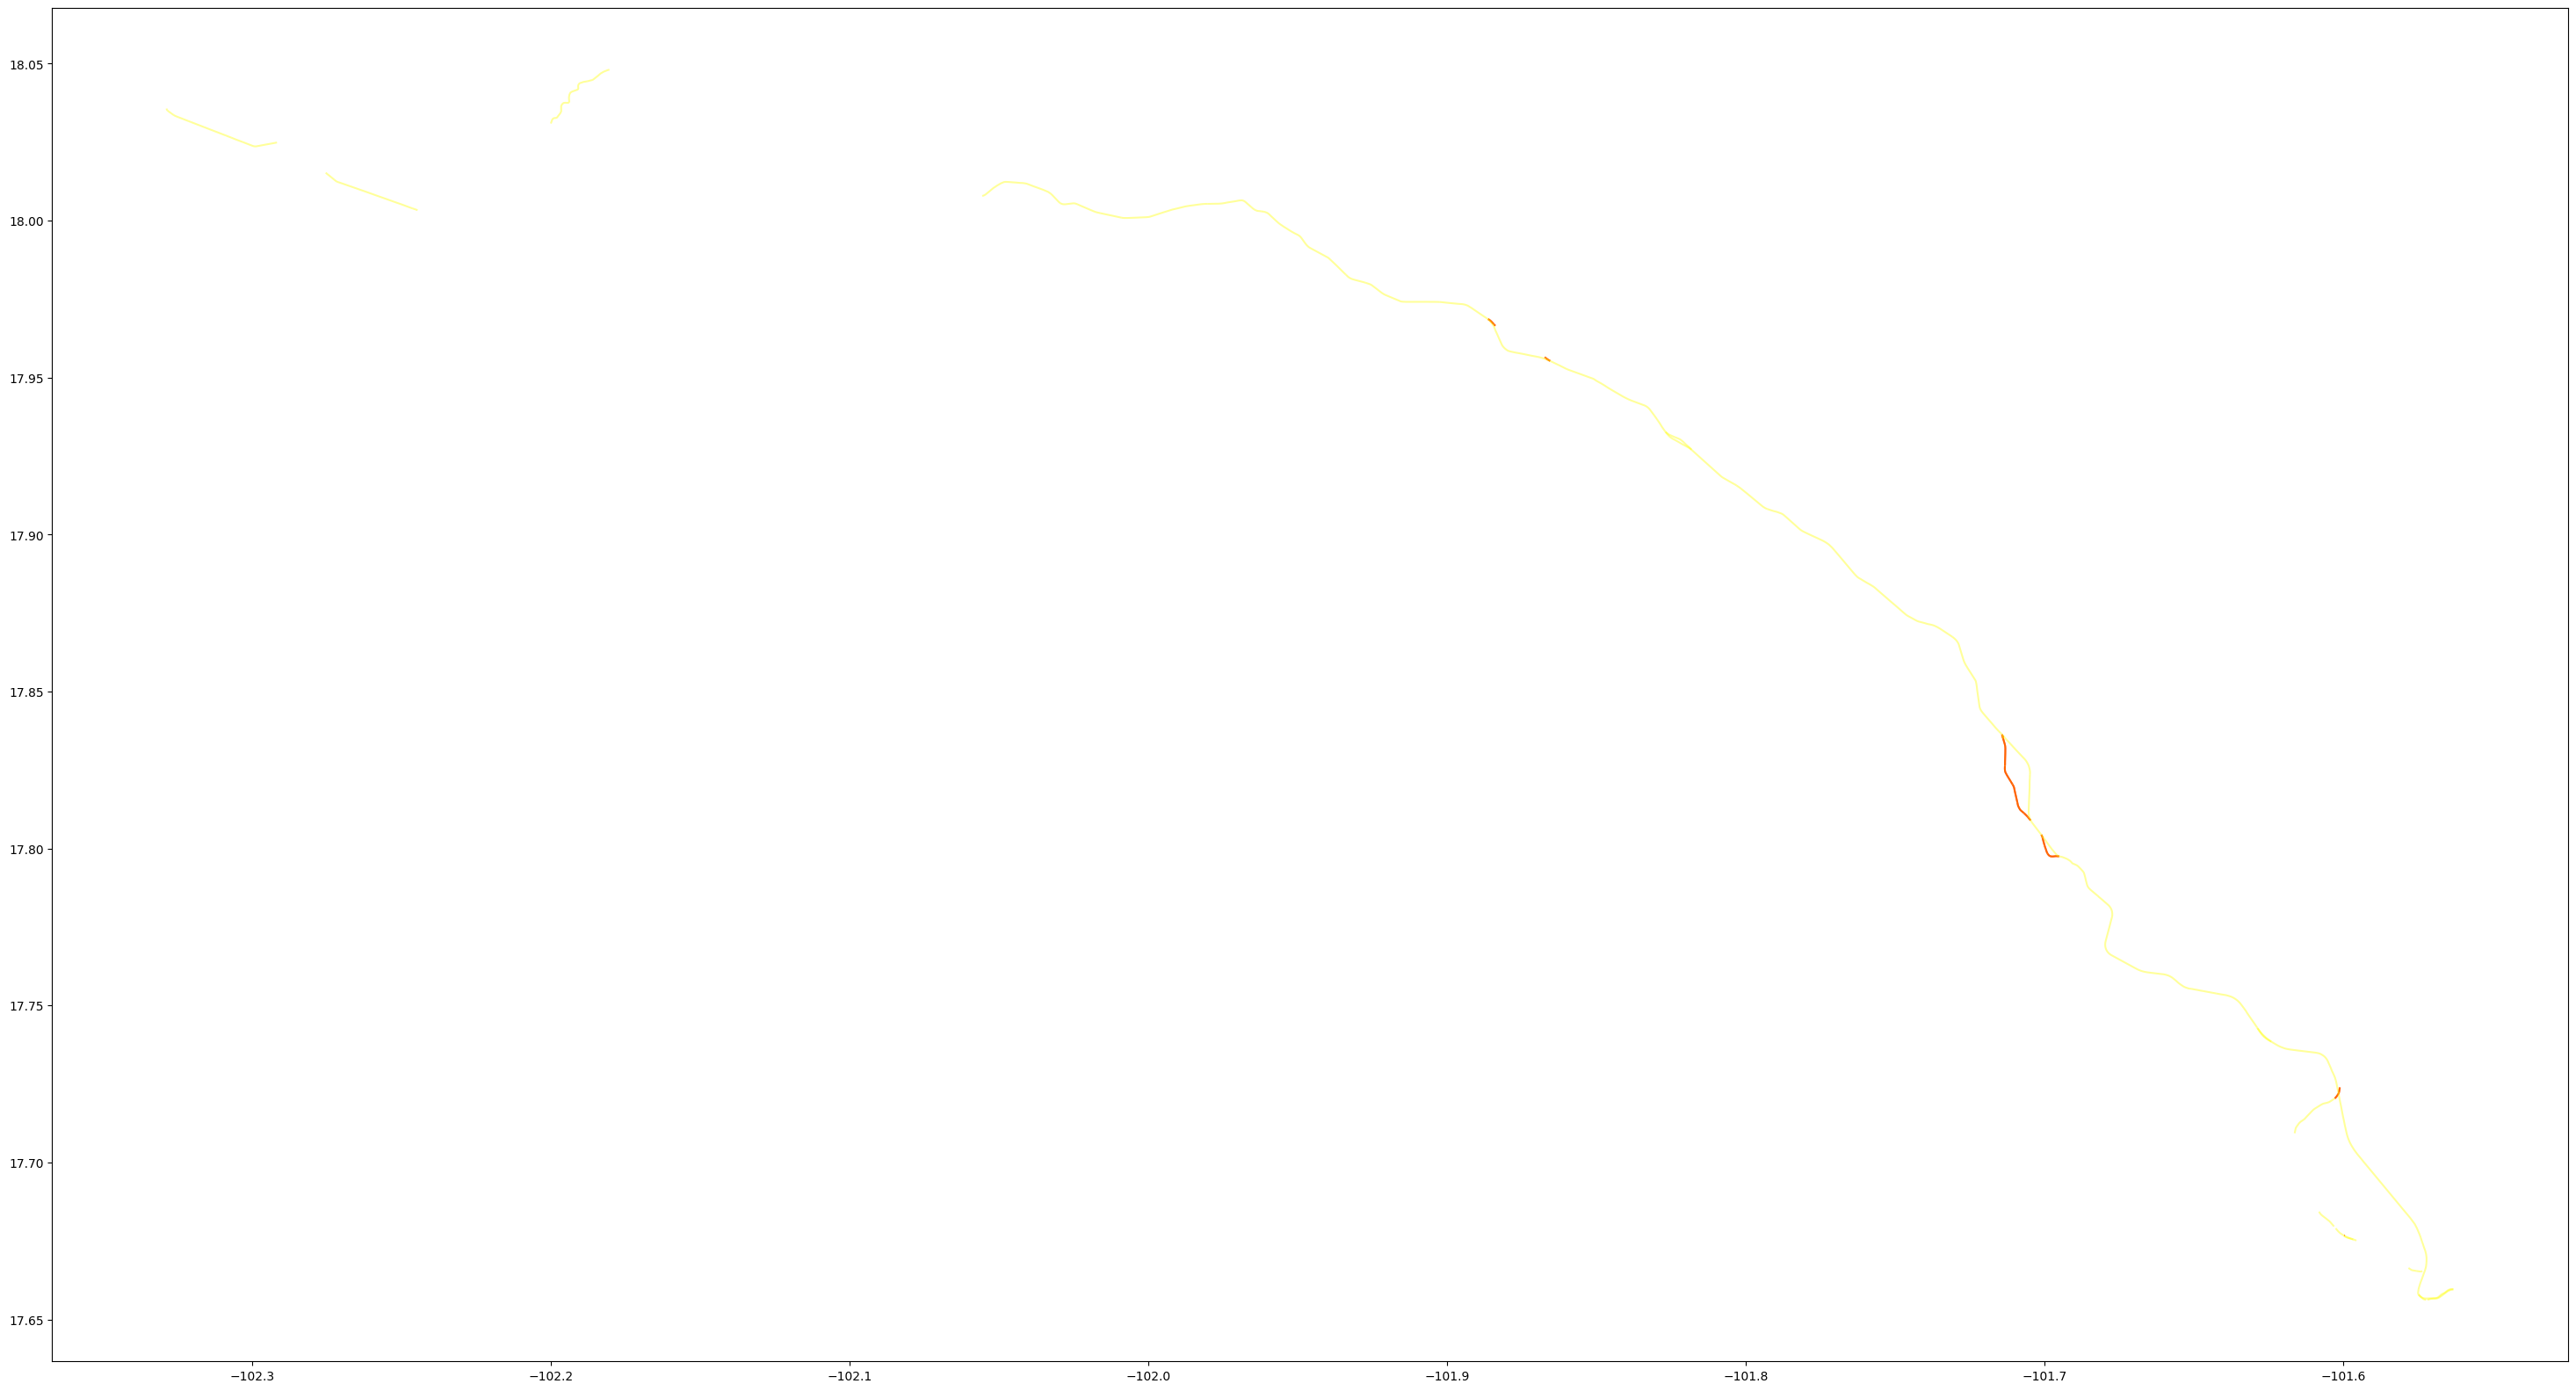

In [ ]:
axis = ziguan.plot(color='red', figsize=(40,20))
zigua.plot(ax=axis, color='yellow',alpha=0.4, figsize=(40,20))

In [ ]:
columna_df1 = 'UNION_INI'
columna_df2 = 'UNION_FIN'

for idx, row in sin_ID.iterrows():
    if row[columna_df1] in CF_con_ID[columna_df2].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df2] == row[columna_df1], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_ini'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_ini'] = 'nd'

for idx, row in sin_ID.iterrows():
    if row[columna_df2] in CF_con_ID[columna_df1].values:
        nombre_df2 = CF_con_ID.loc[CF_con_ID[columna_df1] == row[columna_df2], 'NOMBRE'].values[0]
        sin_ID.loc[idx, 'conex_fin'] = nombre_df2
    else:
        sin_ID.loc[idx, 'conex_fin'] = 'nd'

In [ ]:
sin_ID

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin
455,12925,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1490838,1490839,703.185436,6.5,2020-10-12 12:53:13,Definida,"LINESTRING (-101.65692 17.75876, -101.65677 17...",nd,nd
458,12934,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,929164,2852,1018.532121,6.5,2021-04-15 12:29:14,Definida,"LINESTRING (-101.64469 17.75337, -101.64459 17...",nd,nd
523,13325,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,1490839,929163,646.472456,6.5,2020-10-12 12:25:30,Definida,"LINESTRING (-101.65131 17.75550, -101.65111 17...",nd,nd
536,13387,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,2852,2698,165.746736,6.5,2021-04-21 13:12:46,Definida,"LINESTRING (-101.63713 17.74802, -101.63702 17...",nd,nd
720,14380,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,80,929605,1491310,578.254864,6.5,2020-10-12 11:10:33,Definida,"LINESTRING (-101.87095 17.96040, -101.86916 17...",nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112633,2647944,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,50,481396,481397,48.106395,8.0,2022-08-01 19:11:43,Definida,"LINESTRING (-98.85756 19.67894, -98.85773 19.6...",nd,nd
112634,2647945,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,50,481398,481396,45.828791,8.0,2022-08-01 19:11:53,Definida,"LINESTRING (-98.85799 19.67902, -98.85795 19.6...",nd,nd
114019,3061140,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,794399,794400,5.889365,9.0,2023-05-12 18:33:26,Definida,"LINESTRING (-98.71714 20.12692, -98.71717 20.1...",nd,nd
114041,3065070,Carretera,nd,N/D,Con pavimento,Asfalto,2,Habilitado,En operación,0,...,40,797319,797320,10.969842,9.0,2023-05-15 16:05:09,Definida,"LINESTRING (-98.71354 20.12010, -98.71349 20.1...",nd,nd


In [ ]:
sin_ID.loc[(sin_ID['conex_ini'] !='nd') | (sin_ID['conex_fin'] !='nd')]

,ID_RED,TIPO_VIAL,NOMBRE,CODIGO,COND_PAV,RECUBRI,CARRILES,ESTATUS,CONDICION,NIVEL,...,VELOCIDAD,UNION_INI,UNION_FIN,LONGITUD,ANCHO,FECHA_ACT,CALIREPR,geometry,conex_ini,conex_fin


In [ ]:
CF_agrupadas = CF_con_ID.groupby('NOMBRE').agg({
    'UNION_INI': ['max', 'min'],
    'UNION_FIN': ['max', 'min']
})
CF_agrupadas

UNION_INI          UNION_FIN         
                                        max      min       max      min
NOMBRE                                                                 
4_caminos-cercalisa                 1848756   334956   1848756   334956
a_aguascalientes                    1622846   502178   1622846   502464
a_cerro_gordo                       1734409   255333   1734409   255333
a_ent_maxipista_guadalajara-tepic   1634164  1602121   1634164  1602121
a_guadalajara                       1653287   395149   1653287   395136
...                                     ...      ...       ...      ...
zapotlanejo-lagos_de_moreno         1855225   127694   1855225   127694
zaragoza-la_encantada-la_bolsa      1017822  1017822   1018586  1018586
zihuatanejo-la_mira                 1842104     2678   1842104     2811
zihuatanejo-playa_azul              1818733   208625   1818733   208625
zitacuaro-ciudad_altamirano         1910458      588   1910458      788

[990 rows x 4 columns]

In [ ]:
CF_agrupadas.columns = ['UNION_INI_max', 'UNION_INI_min', 'UNION_FIN_max', 'UNION_FIN_min']


In [ ]:
CF_agrupadas['UNION_MAX'] = CF_agrupadas[['UNION_INI_max', 'UNION_FIN_max']].max(axis=1)
CF_agrupadas['UNION_MIN'] = CF_agrupadas[['UNION_INI_min', 'UNION_FIN_min']].min(axis=1)

In [ ]:
CF_INI_FIN = CF_agrupadas[['UNION_MAX', 'UNION_MIN']]


In [ ]:
CF_INI_FIN

,UNION_MAX,UNION_MIN
NOMBRE,,
4_caminos-cercalisa,1848756,334956
a_aguascalientes,1622846,502178
a_cerro_gordo,1734409,255333
a_ent_maxipista_guadalajara-tepic,1634164,1602121
a_guadalajara,1653287,395136
...,...,...
zapotlanejo-lagos_de_moreno,1855225,127694
zaragoza-la_encantada-la_bolsa,1018586,1017822
zihuatanejo-la_mira,1842104,2678


In [ ]:
# prompt: AÑADIR EL INDEX CF_INI_FIN EN OTRA COLUMNA LLAMADA 'NOMBRE'

CF_INI_FIN['NOMBRE'] = CF_INI_FIN.index


<ipython-input-109-1a1f98fbd051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CF_INI_FIN['NOMBRE'] = CF_INI_FIN.index


In [ ]:
CF_INI_FIN

,UNION_MAX,UNION_MIN,NOMBRE
NOMBRE,,,
4_caminos-cercalisa,1848756,334956,4_caminos-cercalisa
a_aguascalientes,1622846,502178,a_aguascalientes
a_cerro_gordo,1734409,255333,a_cerro_gordo
a_ent_maxipista_guadalajara-tepic,1634164,1602121,a_ent_maxipista_guadalajara-tepic
a_guadalajara,1653287,395136,a_guadalajara
...,...,...,...
zapotlanejo-lagos_de_moreno,1855225,127694,zapotlanejo-lagos_de_moreno
zaragoza-la_encantada-la_bolsa,1018586,1017822,zaragoza-la_encantada-la_bolsa
zihuatanejo-la_mira,1842104,2678,zihuatanejo-la_mira
